In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
dates = session.query(measurement.date).all()
print(pd.DataFrame(dates).max())

date    2017-08-23
dtype: object


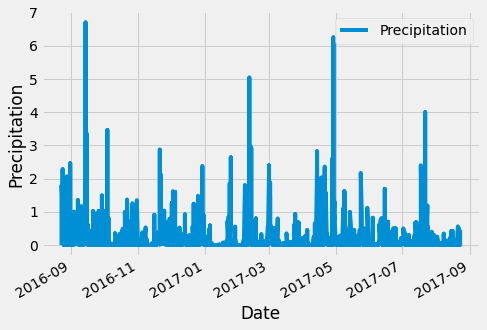

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

#query filter by only retrieving dates past a year before the most recent date
data = session.query(measurement).filter(measurement.date >= dt.date(2016,8,23))

#Set up empty arrays to store in the queries
precipitation = []
date = []

#use the for loop to fill in the arrays with the query
for x in data:
    precipitation.append(x.prcp)
    date.append(x.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_dict = {
    "Date" : date,
    "Precipitation" : precipitation
}

Prec_data = pd.DataFrame(prec_dict)
Prec_data['Date'] = pd.to_datetime(Prec_data["Date"])
Prec_data = Prec_data.dropna(how='any')
Prec_data = Prec_data.set_index(Prec_data["Date"])
# Sort the dataframe by date

Prec_data = Prec_data.sort_index()
del Prec_data["Date"]



# Use Pandas Plotting with Matplotlib to plot the data

Prec_data.plot(figsize=(7,5), ylabel = "Precipitation");


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prec_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).count()
print(f' There are {station_count} stations in the data set')

 There are 9 stations in the data set


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#Empty Arrays made to store station names and count
Station_Names = []
Station_Count = []

#Establish a session for station names
data2 = session.query(station.station).all()

for x in data2:
    Station_Names.append(x.station)

#Grab the counts of each station using a for-loop
for x in range(0, len(Station_Names)):
    Station_Count.append(session.query(measurement).filter(measurement.station == Station_Names[x]).count())

#Use zips to sort the two lists together,    
zippy_list = zip(Station_Count,Station_Names)
sorted_zippy = sorted(zippy_list, reverse=True)

#and then decouple them for more usablitiy 
tuples = zip(*sorted_zippy)
Station_Count, Station_Names = [list(tuple) for tuple in tuples]

print(Station_Names)
print(Station_Count)

['USC00519281', 'USC00519397', 'USC00513117', 'USC00519523', 'USC00516128', 'USC00514830', 'USC00511918', 'USC00517948', 'USC00518838']
[2772, 2724, 2709, 2669, 2612, 2202, 1979, 1372, 511]


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print("USC00519281 has is the most active station")
Temperatures = []
data3 = session.query(measurement).filter(measurement.station == Station_Names[0])

for x in data3:
    Temperatures.append(x.tobs)

min_temp = min(Temperatures)
max_temp = max(Temperatures)
mean_temp = round(np.mean(Temperatures),1)

print(f'Minimum Temp : {min_temp}F \nMaximum Temperature : {max_temp}F \nAverage Temperature : {mean_temp}F'  )

USC00519281 has is the most active station
Minimum Temp : 54.0F 
Maximum Temperature : 85.0F 
Average Temperature : 71.7F


Text(0.5, 0, 'Temperature')

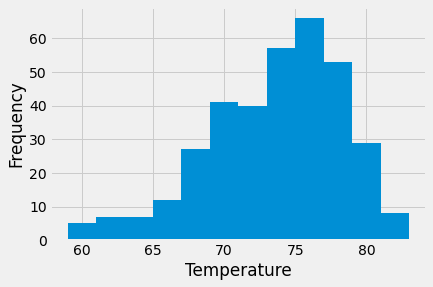

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature2 = []
data4 = session.query(measurement).filter(measurement.station == Station_Names[0]). \
    filter(measurement.date >= dt.date(2016,8,23))

for x in data4:
    temperature2.append(x.tobs)

plt.hist(temperature2, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature');

# Close session

In [19]:
# Close Session
session.close()